# Scaling coordinate lists

Presume you have a list of coordinates derived from an image. In case the image has a specified pixel size, you can convert pixel coordinates in physical coordinates.

In [1]:
from skimage.io import imread
import pyclesperanto_prototype as cle
import stackview

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
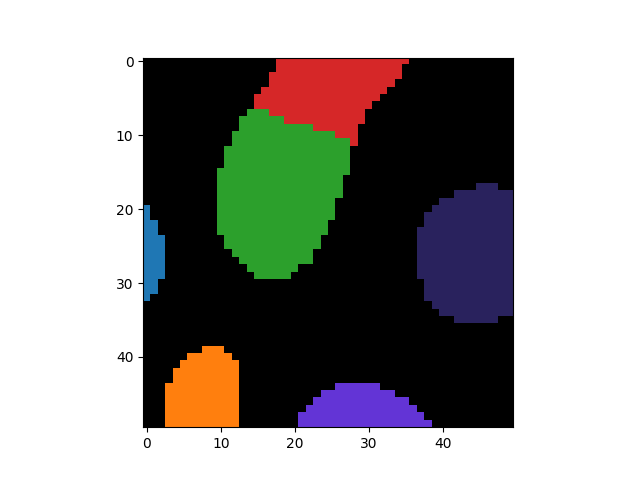

In [2]:
image = imread("../../data/blobs.tif")[:50,:50]

label_image = cle.voronoi_otsu_labeling(image, spot_sigma=4)

label_image

From the objects in this label image, we can derive centroid coordinates.

In [3]:
centroids = cle.centroids_of_labels(label_image)
centroids

cl.OCLArray([[ 0.7586207,  7.7894735, 17.849672 , 24.59091  , 29.01266  ,
        43.57143  ],
       [26.275862 , 44.63158  , 17.79085  ,  4.071429 , 47.02532  ,
        26.266666 ]], dtype=float32)

Such a point list has d times n numbers for d dimensions (commonly 2 or 3) and n points.

In [4]:
centroids.shape

(2, 6)

In case pixel size is known, we can compute the centroid coordinates in physical units.

In [5]:
pixel_size_in_microns = [0.1, 0.1]

In [6]:
centroids_in_microns = centroids * cle.asarray([pixel_size_in_microns]).T

centroids_in_microns

cl.OCLArray([[0.07586207, 0.77894735, 1.7849673 , 2.459091  , 2.9012659 ,
        4.357143  ],
       [2.6275861 , 4.463158  , 1.779085  , 0.40714288, 4.702532  ,
        2.6266668 ]], dtype=float32)